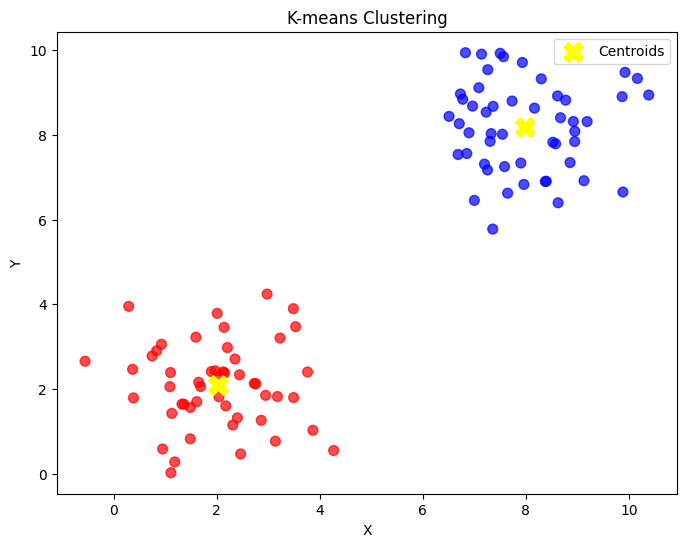

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Buat data acak berbentuk dua cluster
np.random.seed(0)
data_cluster1 = np.random.randn(50, 2) + [2, 2]  # Cluster 1 di sekitar (2,2)
data_cluster2 = np.random.randn(50, 2) + [8, 8]  # Cluster 2 di sekitar (8,8)
data = np.vstack([data_cluster1, data_cluster2])  # Gabungkan data jadi satu

# 2. Terapkan K-means dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)
labels = kmeans.labels_  # Label hasil clustering
centroids = kmeans.cluster_centers_  # Posisi centroid

# 3. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in labels]  # Warna sesuai cluster

plt.scatter(data[:, 0], data[:, 1], c=colors, s=50, alpha=0.7)  # Plot titik data
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', label='Centroids')  # Plot centroid

plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


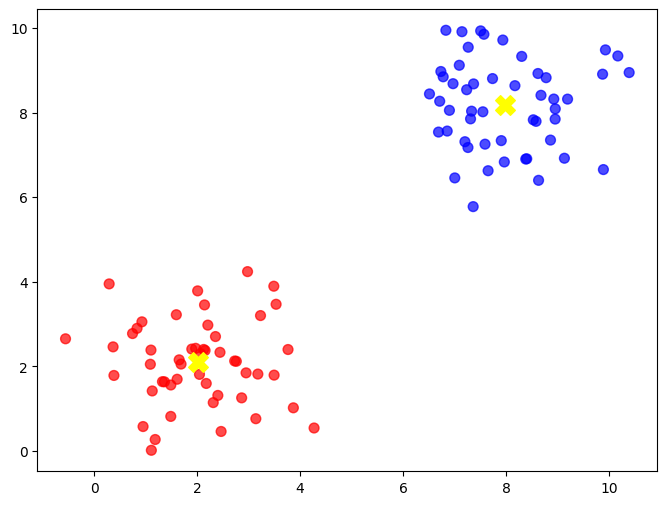

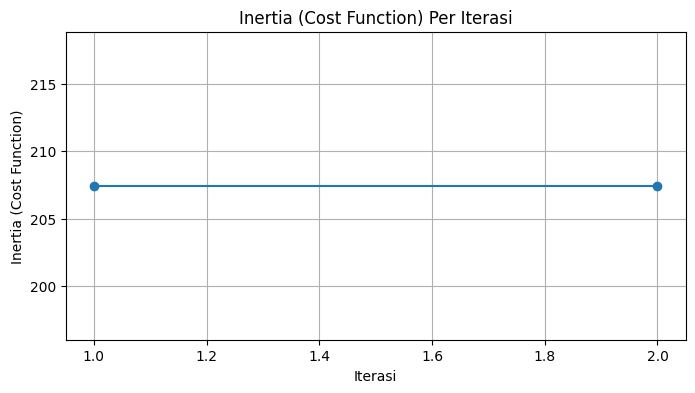

Inertia per iterasi: [207.43658164804407, 207.43658164804407]
Konvergensi tercapai setelah 2 iterasi dengan inertia = 207.43658164804407


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Buat data acak berbentuk dua cluster
np.random.seed(0)
data_cluster1 = np.random.randn(50, 2) + [2, 2]  # Cluster 1 di sekitar (2,2)
data_cluster2 = np.random.randn(50, 2) + [8, 8]  # Cluster 2 di sekitar (8,8)
data = np.vstack([data_cluster1, data_cluster2])  # Gabungkan data jadi satu

# 2. Terapkan K-means dengan 2 cluster dan set max_iter untuk kontrol iterasi
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1, max_iter=100)
kmeans.fit(data)

# 3. Periksa nilai inertia (cost function) setelah konvergensi
inertia_values = []  # Menyimpan nilai inertia di tiap iterasi
for i in range(kmeans.n_iter_):
    inertia_values.append(kmeans.inertia_)

# 4. Visualisasi hasil clustering dan perhitungan inertia
plt.figure(figsize=(8, 6))

# Plotting data points dengan warna sesuai dengan cluster yang dihasilkan
colors = ['blue' if label == 0 else 'red' for label in kmeans.labels_]
plt.scatter(data[:, 0], data[:, 1], c=colors, s=50, alpha=0.7)

# Plot centroid
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', label='Centroids')

# Plotting cost function (inertia) per iterasi
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(inertia_values) + 1), inertia_values, marker='o')
plt.title('Inertia (Cost Function) Per Iterasi')
plt.xlabel('Iterasi')
plt.ylabel('Inertia (Cost Function)')
plt.grid(True)
plt.show()

# Print inertia untuk memantau konvergensi
print("Inertia per iterasi:", inertia_values)
print(f"Konvergensi tercapai setelah {kmeans.n_iter_} iterasi dengan inertia = {kmeans.inertia_}")


In [2]:
import numpy as np

# Data temperatur dalam satu minggu (dalam derajat Celcius)
temperatures = np.array([22, 21, 23, 22, 100, 23, 21])  # "100" adalah anomali

# Menghitung rata-rata dan standar deviasi
mean_temp = np.mean(temperatures)
std_dev = np.std(temperatures)

# Menentukan threshold (misalnya: 1 standar deviasi dari rata-rata)
threshold = 1 * std_dev

# Mengidentifikasi data yang berada di luar threshold sebagai anomali
anomalies = []
for temp in temperatures:
    if abs(temp - mean_temp) > threshold:
        anomalies.append(temp)

print("Data temperatur:", temperatures)
print("Rata-rata temperatur:", mean_temp)
print("Standar deviasi:", std_dev)
print("Anomali yang terdeteksi:", anomalies[0])


Data temperatur: [ 22  21  23  22 100  23  21]
Rata-rata temperatur: 33.142857142857146
Standar deviasi: 27.304780175056592
Anomali yang terdeteksi: 100


In [4]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Data temperatur (termasuk anomali)
temperatures = np.array([22, 21, 23, 22, 100, 23, 21])
labels = np.array([0, 0, 0, 0, 1, 0, 0])  # Label 1 untuk anomali (100), 0 untuk normal

# Membagi data menjadi set pelatihan dan set validasi-pengujian
train_data = temperatures[labels == 0]  # Hanya data normal untuk pelatihan
validation_data = temperatures
validation_labels = labels

# Menghitung rata-rata dan standar deviasi pada data pelatihan
mean_temp = np.mean(train_data)
std_dev = np.std(train_data)

# Menentukan threshold untuk deteksi anomali (misalnya: 2 standar deviasi dari rata-rata)
threshold = 2 * std_dev

# Deteksi anomali berdasarkan threshold
predictions = np.abs(validation_data - mean_temp) > threshold

# Evaluasi kinerja model menggunakan precision dan recall
precision = precision_score(validation_labels, predictions)
recall = recall_score(validation_labels, predictions)

print("Data temperatur:", temperatures)
print("Rata-rata temperatur pada set pelatihan:", mean_temp)
print("Standar deviasi pada set pelatihan:", std_dev)
print("Threshold anomali:", threshold)
print("Prediksi anomali:", predictions)
print("Precision:", precision)
print("Recall:", recall)


Data temperatur: [ 22  21  23  22 100  23  21]
Rata-rata temperatur pada set pelatihan: 22.0
Standar deviasi pada set pelatihan: 0.816496580927726
Threshold anomali: 1.632993161855452
Prediksi anomali: [False False False False  True False False]
Precision: 1.0
Recall: 1.0


In [1]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Data temperatur (termasuk anomali)
temperatures = np.array([22, 21, 23, 22, 100, 23, 21])
labels = np.array([0, 0, 0, 0, 1, 0, 0])  # Label 1 untuk anomali (100), 0 untuk normal

# Membagi data menjadi set pelatihan dan set validasi-pengujian
train_data = temperatures[labels == 0]  # Hanya data normal untuk pelatihan
validation_data = temperatures
validation_labels = labels

# Memulai list untuk menyimpan prediksi
predictions = []

# Loop per data untuk deteksi anomali dengan perhitungan rata-rata dan deviasi berulang
for temp in validation_data:
    # Menghitung ulang rata-rata dan standar deviasi tiap kali (tidak perlu)
    mean_temp = np.mean(train_data)
    std_dev = np.std(train_data)
    
    # Menghitung threshold tiap iterasi
    threshold = 2 * std_dev
    
    # Deteksi anomali dan menyimpannya
    is_anomaly = abs(temp - mean_temp) > threshold
    predictions.append(is_anomaly)

# Mengonversi hasil prediksi ke array numpy
predictions = np.array(predictions)

# Loop untuk mengulang perhitungan precision dan recall
for _ in range(5):  # perulangan yang tidak perlu
    precision = precision_score(validation_labels, predictions)
    recall = recall_score(validation_labels, predictions)

# Menampilkan hasil akhir
print("Data temperatur:", temperatures)
print("Rata-rata temperatur pada set pelatihan:", mean_temp)
print("Standar deviasi pada set pelatihan:", std_dev)
print("Threshold anomali:", threshold)
print("Prediksi anomali:", predictions)
print("Precision:", precision)
print("Recall:", recall)


Data temperatur: [ 22  21  23  22 100  23  21]
Rata-rata temperatur pada set pelatihan: 22.0
Standar deviasi pada set pelatihan: 0.816496580927726
Threshold anomali: 1.632993161855452
Prediksi anomali: [False False False False  True False False]
Precision: 1.0
Recall: 1.0


In [2]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Data temperatur (termasuk anomali)
temperatures = np.array([22, 21, 23, 22, 100, 23, 21])
labels = np.array([0, 0, 0, 0, 1, 0, 0])  # Label 1 untuk anomali (100), 0 untuk normal

# Membagi data menjadi set pelatihan dan set validasi-pengujian
train_data = temperatures[labels == 0]  # Hanya data normal untuk pelatihan
validation_data = temperatures
validation_labels = labels

# Menghitung rata-rata dan standar deviasi satu kali dari data normal di set pelatihan
mean_temp = np.mean(train_data)
std_dev = np.std(train_data)

# Menentukan threshold untuk deteksi anomali (misalnya: 2 standar deviasi dari rata-rata)
threshold = 2 * std_dev

# Deteksi anomali dengan operasi vektorisasi (tidak ada loop)
predictions = np.abs(validation_data - mean_temp) > threshold

# Evaluasi kinerja model menggunakan precision, recall, dan confusion matrix
precision = precision_score(validation_labels, predictions)
recall = recall_score(validation_labels, predictions)
conf_matrix = confusion_matrix(validation_labels, predictions)

# Menampilkan hasil akhir
print("Data temperatur:", temperatures)
print("Rata-rata temperatur pada set pelatihan:", mean_temp)
print("Standar deviasi pada set pelatihan:", std_dev)
print("Threshold anomali:", threshold)
print("Prediksi anomali:", predictions)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


Data temperatur: [ 22  21  23  22 100  23  21]
Rata-rata temperatur pada set pelatihan: 22.0
Standar deviasi pada set pelatihan: 0.816496580927726
Threshold anomali: 1.632993161855452
Prediksi anomali: [False False False False  True False False]
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[6 0]
 [0 1]]


In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Data Rating Pengguna (Row = Pengguna, Column = Film)
ratings = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [0, 0, 5, 4],
    [0, 3, 4, 0]
])

# Data Fitur Film (misal genre film)
# Genre: Aksi, Drama, Komedi, Romantis
movie_features = np.array([
    [1, 0, 0, 0],  # Film 1: Aksi
    [0, 1, 0, 0],  # Film 2: Drama
    [0, 0, 1, 0],  # Film 3: Komedi
    [0, 0, 0, 1]   # Film 4: Romantis
])

# 1. **Collaborative Filtering: User-based**

# Menghitung kemiripan antar pengguna menggunakan cosine similarity
user_similarity = cosine_similarity(ratings)

# Menampilkan hasil kemiripan antar pengguna
print("User Similarity Matrix:")
print(user_similarity)

# Fungsi untuk memberi rekomendasi berdasarkan kemiripan pengguna
def user_based_recommendations(user_index):
    similar_users = user_similarity[user_index]
    similar_users_index = np.argsort(similar_users)[::-1]  # Urutkan berdasarkan kemiripan tertinggi

    recommended_movies = []
    for user in similar_users_index:
        # Mengambil film yang sudah diberi rating oleh pengguna yang mirip, tetapi belum ditonton oleh user_index
        for movie_index in range(len(ratings[user])):
            if ratings[user][movie_index] > 0 and ratings[user_index][movie_index] == 0:
                recommended_movies.append(movie_index)
    return recommended_movies

# Rekomendasi untuk pengguna ke-0
print("Rekomendasi untuk User 0 berdasarkan User-based CF:")
print(user_based_recommendations(0))


# 2. **Content-Based Filtering: Berdasarkan Fitur Film**

# Menghitung kemiripan antar film berdasarkan fitur genre menggunakan cosine similarity
movie_similarity = cosine_similarity(movie_features)

# Menampilkan hasil kemiripan antar film
print("\nMovie Similarity Matrix:")
print(movie_similarity)

# Fungsi untuk memberi rekomendasi film berdasarkan kemiripan konten
def content_based_recommendations(user_ratings):
    recommended_movies = []
    for movie_index, rating in enumerate(user_ratings):
        if rating > 0:  # Film yang sudah ditonton
            # Ambil film lain yang mirip
            similar_movies = np.argsort(movie_similarity[movie_index])[::-1]
            for similar_movie in similar_movies:
                if similar_movie != movie_index and user_ratings[similar_movie] == 0:
                    recommended_movies.append(similar_movie)
    return recommended_movies

# Rekomendasi untuk pengguna ke-0 berdasarkan Content-based CF
print("Rekomendasi untuk User 0 berdasarkan Content-based CF:")
print(content_based_recommendations(ratings[0]))


User Similarity Matrix:
[[1.         0.86091606 0.42289003 0.10559274 0.30425553]
 [0.86091606 1.         0.42008403 0.1515108  0.        ]
 [0.42289003 0.42008403 1.         0.60111309 0.11547005]
 [0.10559274 0.1515108  0.60111309 1.         0.62469505]
 [0.30425553 0.         0.11547005 0.62469505 1.        ]]
Rekomendasi untuk User 0 berdasarkan User-based CF:
[2, 2]

Movie Similarity Matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Rekomendasi untuk User 0 berdasarkan Content-based CF:
[np.int64(2), np.int64(2), np.int64(2)]


[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
  0.31171108 0.52006802 0.54671028 0.18485446]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998 0.92187424
  0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
  0.14092422 0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734 0.72900717
  0.77127035 0.07404465 0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232 0.32518332
  0.72960618

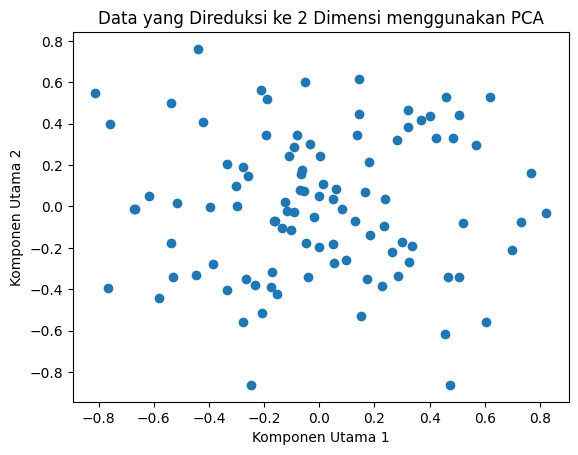

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Misalnya, kita punya data acak berdimensi 10 (10 fitur)
np.random.seed(42)  # Untuk hasil yang konsisten
data = np.random.rand(100, 10)  # 100 sampel, 10 fitur

print(data)

# Menerapkan PCA untuk mereduksi data menjadi 2 dimensi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Menampilkan hasil reduksi dimensi (data yang sudah direduksi menjadi 2 dimensi)
print("Data yang sudah direduksi menjadi 2 dimensi:")
print(reduced_data[:5])  # Menampilkan 5 baris pertama

# Visualisasi data yang sudah direduksi ke 2 dimensi
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data yang Direduksi ke 2 Dimensi menggunakan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()
